In [113]:
%load_ext autoreload
%autoreload 2
import siren
from siren.SIREN_Controller import SIREN_Controller
import os
import pandas as pd
import numpy as np
import awkward as ak
import matplotlib.pyplot as plt
plt.style.use("figures.mplstyle")
from SIREN_Simulation import RunLHCbMuonSimulation

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [75]:
siren_intput_file = "Data/SIREN/Input/LHC13_EPOSLHC_light_0.txt"
forward_flux_files = {
    "LHC13":{
        "light":["DPMJET", "EPOSLHC", "PYTHIA8", "QGSJET", "SIBYLL"],
        "charm":["BDGJKR", "BKRS", "BKSS", "MS", "SIBYLL"]
    },
    "Large":{
        "light":["EPOSLHC"],
        "charm":["BKRS"]
    },
    "Run3":{
        "light":["EPOSLHC"],
        "charm":["POWHEG+P8monash"]
    },
    "VLarge":{
        "light":["EPOSLHC","SIBYLL"],
        "charm":["BKRS"]
    }
}
for prefix,parent_dict in forward_flux_files.items():
    for parent,generators in parent_dict.items():
        for generator in generators:
            siren_input_file = "Data/SIREN/Input/LHCb_%s_%s_%s.txt"%(prefix,generator,parent)
            if not os.path.isfile(siren_input_file):
                print("Preparing",siren_input_file)
                flux_data = PrepareSIRENInputFromLHCb(prefix,generator,parent)
                flux_data.to_csv(siren_input_file,index=False)
            siren_output_file = "Data/SIREN/Output/LHCb_%s_%s_%s"%(prefix,generator,parent)
            if not os.path.isfile(siren_output_file+".parquet"):
                print("Running",siren_output_file)
                RunLHCbMuonSimulation(prefix,generator,parent,
                                      int(1e6),siren_output_file)

Running Data/SIREN/Output/LHCb_LHC13_DPMJET_light
Running Data/SIREN/Output/LHCb_LHC13_EPOSLHC_light
Running Data/SIREN/Output/LHCb_LHC13_PYTHIA8_light
Running Data/SIREN/Output/LHCb_LHC13_QGSJET_light
Running Data/SIREN/Output/LHCb_LHC13_SIBYLL_light
Running Data/SIREN/Output/LHCb_LHC13_BDGJKR_charm
Running Data/SIREN/Output/LHCb_LHC13_BKRS_charm
Running Data/SIREN/Output/LHCb_LHC13_BKSS_charm
Running Data/SIREN/Output/LHCb_LHC13_MS_charm
Running Data/SIREN/Output/LHCb_LHC13_SIBYLL_charm
Preparing Data/SIREN/Input/LHCb_VLarge_SIBYLL_light.txt
Running Data/SIREN/Output/LHCb_VLarge_SIBYLL_light
Preparing Data/SIREN/Input/LHCb_VLarge_BKRS_charm.txt
Running Data/SIREN/Output/LHCb_VLarge_BKRS_charm


In [90]:


hit_map = np.sum([[len(arr)>0 for arr in ints]for ints in panel_intersections],axis=-1)
zbins = np.linspace(0,21000,50)
xybins = np.linspace(-10,10,50)
plt.hist2d(np.array(mu_vertex[:,0]),
           np.array(mu_vertex[:,1]),
           bins = xybins)
plt.show()

plt.hist2d(np.array(mu_vertex[:,2]),
           np.array(mu_vertex[:,1]),
           bins = (zbins,xybins))
plt.show()

#plt.hist(np.array(mu_vertex[:,2]),bins=zbins)
print(np.squeeze(data.wgt)*np.prod(data.int_probs,axis=-1))
weights = np.array(np.squeeze(data.wgt) * lumi * 1000 * np.prod(data.int_probs,axis=-1))
weights *= 2e5 / events_to_inject # correct for sampling

plt.hist(np.array(mu_vertex[:,2])[hit_map==0],bins=zbins,weights=weights[hit_map==0],histtype="step")
plt.hist(np.array(mu_vertex[:,2])[hit_map==1],bins=zbins,weights=weights[hit_map==1],histtype="step")
plt.hist(np.array(mu_vertex[:,2])[hit_map==2],bins=zbins,weights=weights[hit_map==2],histtype="step")
plt.hist(np.array(mu_vertex[:,2])[hit_map==3],bins=zbins,weights=weights[hit_map==3],histtype="step")
plt.semilogy()
plt.show()

plt.hist2d(mu_x,
           mu_y,
           bins = (xybins,xybins),
           weights=weights*(hit_map>0))
plt.show()

mu_radii = np.sqrt(np.array(mu_x)**2 + np.array(mu_y)**2)
plt.hist(mu_radii,bins=np.linspace(0,100,100))
plt.show()

weights = np.array(np.squeeze(data.wgt) * lumi * 1000 * np.squeeze(data.int_probs) * (hit_map>0))
weights *= 2e5 / events_to_inject # correct for sampling
plt.hist(nu_momenta[:,0],bins=e_bins,alpha=0.5,weights=weights)
plt.hist(muon_momenta[:,0],bins=e_bins,alpha=0.5,weights=weights)
plt.hist(hadron_momenta[:,0],bins=e_bins,alpha=0.5,weights=weights)
plt.loglog()

NameError: name 'panel_intersections' is not defined

# paper figures from SIREN

EPOSLHC BKSS
DPMJET BKRS
SIBYLL SIBYLL
QGSJET BDGJKR
PYTHIA8 MS


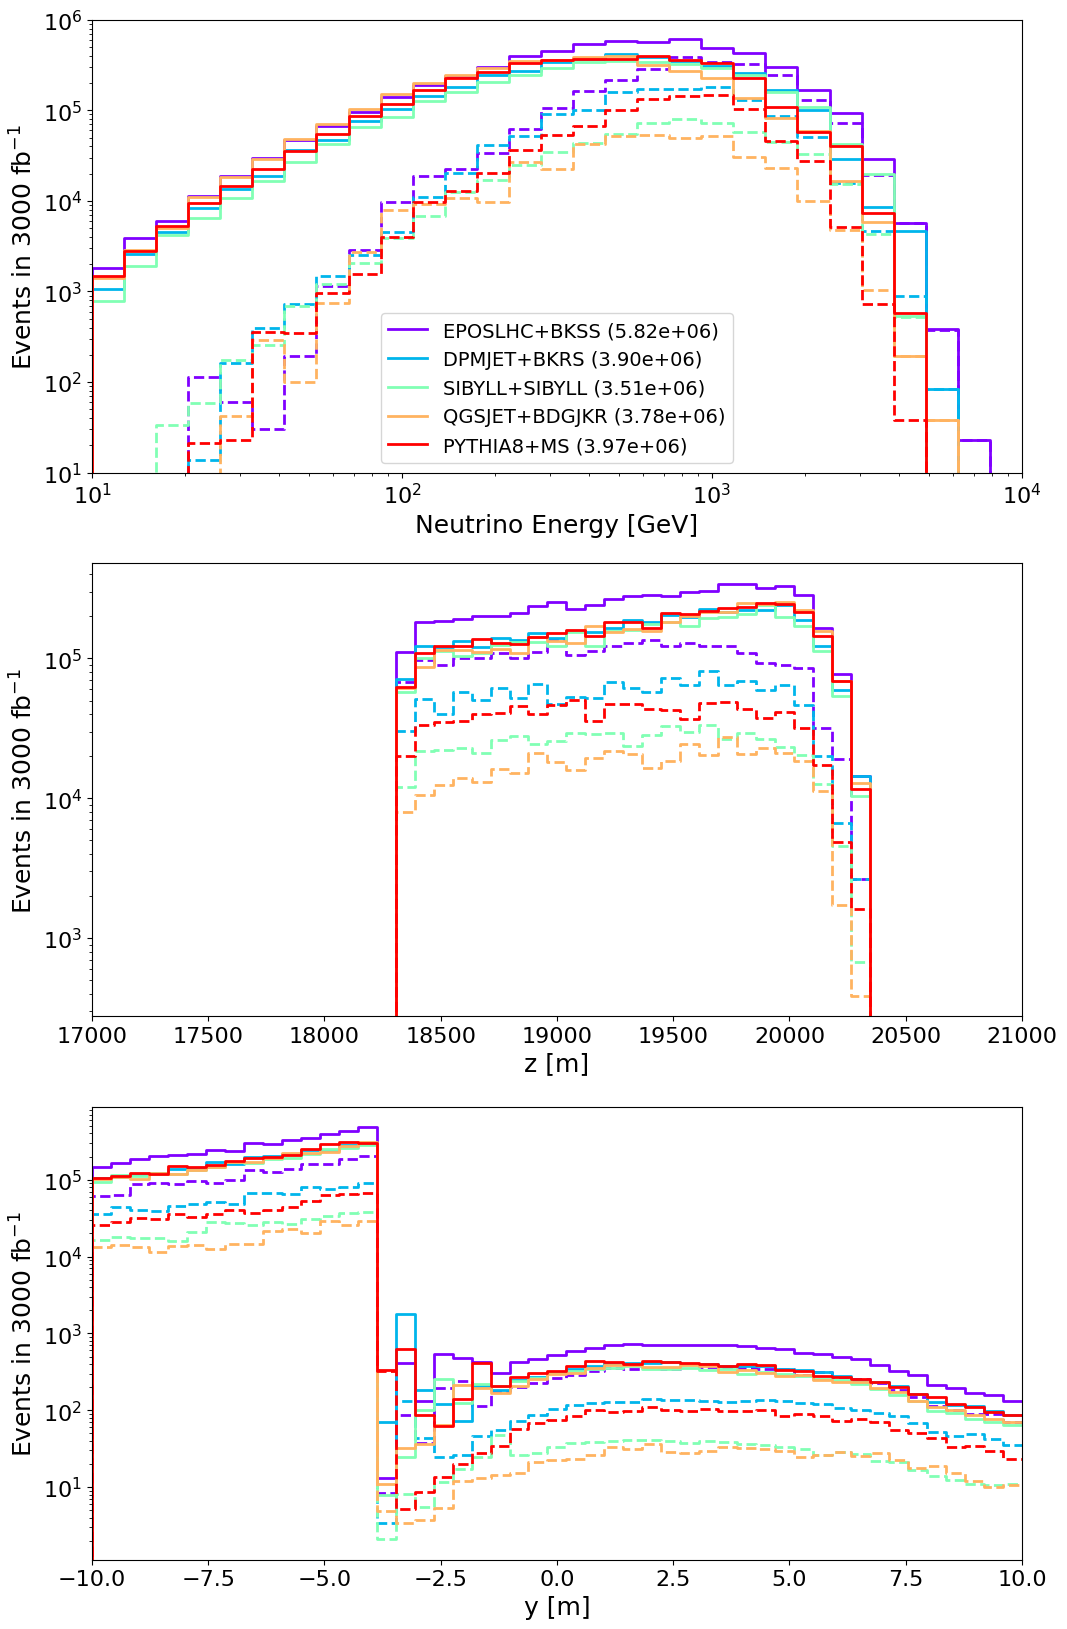

In [117]:
from matplotlib.pyplot import cm
prefix = "LHC13"
light_generators = ["EPOSLHC","DPMJET","SIBYLL","QGSJET","PYTHIA8"]
charm_generators = ["BKSS","BKRS","SIBYLL","BDGJKR","MS"]
color = iter(cm.rainbow(np.linspace(0, 1, len(light_generators))))

fig,ax = plt.subplots(3,1,figsize=(12,20))
xybins = np.linspace(-10,10,50)
zbins = np.linspace(17000,21000,50)

for lg,cg in zip(light_generators,charm_generators):
    print(lg,cg)
    c = next(color)
    
    siren_output_file = "Data/SIREN/Output/LHCb_%s_%s_%s"%(prefix,lg,"light")
    data = ak.from_parquet(siren_output_file+".parquet")
    weights = data.weights * data.hit_mask
    vx = np.squeeze(data.vertex)
    Ehist_l,_ = np.histogram(data.energy,bins=e_bins,weights=weights)
    zhist_l,_ = np.histogram(vx[:,-1],bins=zbins,weights=weights)
    yhist_l,_ = np.histogram(vx[:,1],bins=xybins,weights=weights)
    
    siren_output_file = "Data/SIREN/Output/LHCb_%s_%s_%s"%(prefix,cg,"charm")
    data = ak.from_parquet(siren_output_file+".parquet")
    weights = data.weights * data.hit_mask
    vx = np.squeeze(data.vertex)
    Ehist_c,_ = np.histogram(data.energy,bins=e_bins,weights=weights)
    zhist_c,_ = np.histogram(vx[:,-1],bins=zbins,weights=weights)
    yhist_c,_ = np.histogram(vx[:,1],bins=xybins,weights=weights)
    
    Ehist = Ehist_l+Ehist_c
    zhist = zhist_l+zhist_c
    yhist = yhist_l+yhist_c
    tot = sum(Ehist)
    ax[0].step(e_bins,np.append([0],Ehist),color=c,label="%s+%s (%2.2e)"%(lg,cg,tot))
    ax[0].step(e_bins,np.append([0],Ehist_c),color=c,ls="--")
    ax[1].step(zbins,np.append([0],zhist),color=c)
    ax[1].step(zbins,np.append([0],zhist_c),color=c,ls="--")
    ax[2].step(xybins,np.append([0],yhist),color=c)
    ax[2].step(xybins,np.append([0],yhist_c),color=c,ls="--")

ax[0].loglog()
ax[0].set_ylim(1e1,1e6)
ax[1].semilogy()
ax[2].semilogy()

ax[0].set_xlim(e_bins[0],e_bins[-1])
ax[1].set_xlim(zbins[0],zbins[-1])
ax[2].set_xlim(xybins[0],xybins[-1])

ax[0].set_xlabel("Neutrino Energy [GeV]")
ax[1].set_xlabel("z [m]")
ax[2].set_xlabel("y [m]")
for i in range(3): ax[i].set_ylabel(r"Events in 3000$~{\rm fb}^{-1}$")
ax[0].legend()
plt.show()
            